# Niche reconstruction and spatial domain detection

Author: Francesca Drummer

In [4]:
import squidpy as sq
import scanpy as sc

When dealing with spatial transcriptomics datasets we might be interested in defining structures in the tissue. Some tissue structures that are interesting are: cell neighborhoods, niches, microenvironments or spatial domains. In literature these terms are sometimes used interchangably but here we will distinguish them using the Nicheformer definition. 

- Cellular niches: local structure in a tissue, for example, a tumor niche or immune niche, which vary in gene expression and cell type composition
- Tissue regions or spatial domains: Spatially  consistent cellular state across a larger-than-a-niche tissue context. Tissue regions are composed of multiple different niches and therefore describe higher-level structures. 

## Dataset

We will use the Xenium AD dataset here. 

In [5]:
PATH = '/Users/francesca.drummer/Documents/1_Projects/jaekel/data/xenium_ad.h5ad'

In [6]:
# load adata
adata = sc.read_h5ad(PATH)
adata

AnnData object with n_obs × n_vars = 44955 × 354
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'condition'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

## 1. Cell neighborhood detection via graph construction

Spatial transcriptomics data can be represented as graphs with cells as nodes and edges as relations. Depending on the technology (imaging-based or sequencing-based) different assumptions can be made for the graph structure. 

Here we will explore graph construction and cell neighborhood analysis using the squidpy `sq.gr` module on imaging-based data. 

*Information for graph reconstruciton for sequencing-based data can be found [here](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_spatial_neighbors.html).*

First we construct a graph from the ST data based on number of neighbors to include.  

/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this war

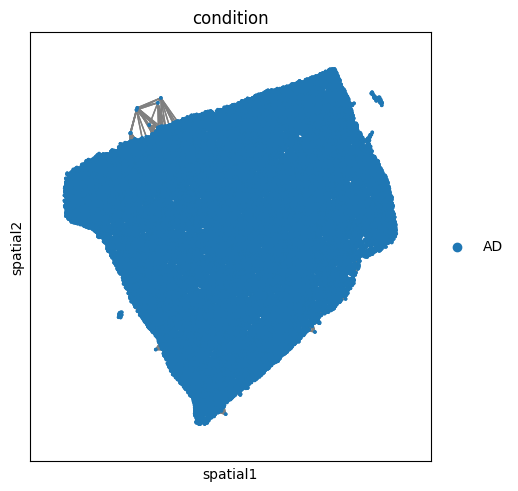

In [10]:
sq.gr.spatial_neighbors(adata, n_neighs=10, coord_type="generic", key_added = 'neighs_based_spatial')
sq.pl.spatial_scatter(
    adata,
    shape=None,
    #library_key = '', TODO: Which library key indicates different FOV?
    color="condition",
    connectivity_key="neighs_based_spatial_connectivities",
    size=10,
)

/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/Users/francesca.drummer/miniconda3/envs/nicheformer-data/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this war

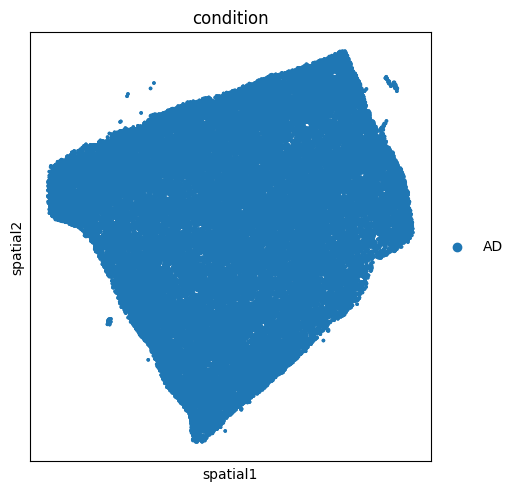

In [12]:
sq.gr.spatial_neighbors(adata, radius=0.3, coord_type="generic", key_added = 'radius_based_spatial')
sq.pl.spatial_scatter(
    adata,
    shape=None,
    #library_key = '', TODO: Which library key indicates different FOV?
    color="condition",
    connectivity_key="radius_based_spatial_connectivities",
    size=10,
)

**Task 1:** What is the difference between the neighborhood and radius based approach? Quantify the difference using the [centrality score](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_centrality_scores.html) and [neighborhood enrichment](https://squidpy.readthedocs.io/en/stable/notebooks/examples/graph/compute_nhood_enrichment.html). 

## 2. Cellular niches

In this section, we will analyse and define cellular niches by cell type composition. 

## 3. Spatial Domain detection with CellCharter